# Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

| Aspect                 | **K-Means Clustering**                                                                                          | **Hierarchical Clustering**                                                                                                                                         |
| ---------------------- | --------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Definition**         | A **partition-based** clustering algorithm that splits data into *K* clusters based on distance from centroids. | A **tree-based** clustering method that builds a hierarchy of clusters (dendrogram) using either bottom-up (**agglomerative**) or top-down (**divisive**) approach. |
| **Number of clusters** | Must be specified in advance (value of *K*).                                                                    | No need to pre-specify clusters; you can cut the dendrogram at any level to decide.                                                                                 |
| **Scalability**        | Works well on large datasets; computationally efficient.                                                        | Computationally expensive (O(n²)) → suitable for small/medium datasets.                                                                                             |
| **Cluster shape**      | Assumes spherical clusters (not good for irregular shapes).                                                     | Can capture complex cluster shapes and nested clusters.                                                                                                             |
| **Result stability**   | Sensitive to initial centroid positions (may converge to local minima).                                         | More stable; always gives the same result for the same distance metric.                                                                                             |
| **Interpretability**   | Provides flat clusters only.                                                                                    | Provides hierarchy (tree structure) showing relationships.                                                                                                          |


# Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.



- Silhouette Score – Purpose & Meaning

The Silhouette Score is a metric used to evaluate the quality of clusters in unsupervised learning (like K-Means, Hierarchical, DBSCAN).

It measures how well each data point fits within its assigned cluster compared to other clusters.

=  Formula

For each point i:

𝑠
(
𝑖
)
=
𝑏
(
𝑖
)
−
𝑎
(
𝑖
)
max
⁡
{
𝑎
(
𝑖
)
,
𝑏
(
𝑖
)
}
s(i)=
max{a(i),b(i)}
b(i)−a(i)
	​


Where:

a(i): Average distance of point i to all other points in the same cluster (intra-cluster distance).

b(i): Average distance of point i to points in the nearest neighboring cluster (inter-cluster distance).

Then the overall Silhouette Score is the average of all
𝑠
(
𝑖
)
s(i).

Interpretation

+1 → Point is well-clustered (close to its own cluster, far from others).

0 → Point lies on the boundary between clusters.

–1 → Point may be assigned to the wrong cluster.

Rule of thumb:

0.71–1.0 → Strong structure (well-separated clusters)

0.51–0.70 → Reasonable structure

0.26–0.50 → Weak structure

≤ 0.25 → No substantial structure (bad clustering)

Purpose in Clustering

Evaluating clustering quality without requiring ground truth labels.

Choosing the optimal number of clusters (K):

Run clustering for different K values.

Compute silhouette score for each.

The K with the highest score is usually the best choice.

Detecting poor clustering assignments (points with negative silhouette scores may be misplaced).

Example / Use Case

Suppose you run K-Means on customer purchase data with K = 3, 4, 5.

K=3 → Silhouette = 0.62 (good separation)

K=4 → Silhouette = 0.70 (better)

K=5 → Silhouette = 0.40 (clusters overlap)

👉 Best choice: K=4 because it balances compactness and separation.

# Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

-  Core Parameters of DBSCAN
1. ε (Epsilon / Radius of Neighborhood)

Defines the maximum distance between two points for one to be considered as in the neighborhood of the other.

Think of it as the "circle radius" around a point.

Influence:

Small ε → Many small clusters, more noise.

Large ε → Fewer, larger clusters (may merge distinct clusters).

2. minPts (Minimum Points)

The minimum number of points required within the ε-neighborhood for a point to be considered a core point.

- Influence:

- Small minPts (e.g., 2–3) → Sensitive to noise, detects small clusters.

- Large minPts → More robust, but may label more points as noise.

How These Parameters Work Together

- Core Point → A point with at least minPts neighbors within distance ε.

Border Point → Has fewer than minPts neighbors but is within ε of a core point.

- Noise Point (Outlier) → Not a core point and not within ε of any core point.

Clusters are formed by connecting core points and their reachable neighbors.

# Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?


1. Distance-Based Nature of Clustering

Both K-Means and DBSCAN rely on distance calculations (usually Euclidean distance).

If features are on different scales, the feature with larger numerical range dominates the distance calculation.

Example:

Feature 1 = Age (20–60)

Feature 2 = Income (20,000–200,000)

Without scaling, income values overshadow age in clustering, leading to biased results.

2. K-Means Specific

K-Means assigns points to the nearest centroid.

If one feature has a larger scale, centroids will shift toward that feature’s dimension.

Result → distorted, unbalanced clusters.

3. DBSCAN Specific

DBSCAN uses ε (radius) to decide neighborhood density.

If features have different scales, ε might be too large in one dimension and too small in another, causing poor detection of clusters or excessive noise.

# Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

* Elbow Method in K-Means
Definition

The Elbow Method is a technique used to determine the optimal number of clusters (K) in K-Means clustering.

It is based on the idea of finding a balance between:

Too few clusters → High within-cluster variance (poor fit).

Too many clusters → Overfitting and unnecessary complexity.

* How It Works

Run K-Means for different values of K (e.g., K = 1 to 10).

For each K, compute the Within-Cluster Sum of Squares (WCSS):

𝑊
𝐶
𝑆
𝑆
=
∑
𝑘
=
1
𝐾
∑
𝑥
∈
𝐶
𝑘
∣
∣
𝑥
−
𝜇
𝑘
∣
∣
2
WCSS=
k=1
∑
K
	​

x∈C
k
	​

∑
	​

∣∣x−μ
k
	​

∣∣
2

Where
𝐶
𝑘
C
k
	​

 is cluster k, and
𝜇
𝑘
μ
k
	​

 is its centroid.

WCSS = measure of compactness (lower is better).

Plot K vs. WCSS.

The graph usually decreases sharply at first, then levels off.

The "elbow point" (where the curve bends) indicates the optimal K.

* Why It Works

Increasing K always reduces WCSS (clusters get smaller, closer to centroids).

But after a certain point, the marginal improvement becomes small.

The “elbow” is the point where adding more clusters does not significantly improve compactness → best trade-off.

* Example Use Case

Suppose we want to segment e-commerce customers:

Run K-Means with K = 1–10.

WCSS curve shows a sharp drop until K=4, then flattens.

✅ Optimal choice: 4 clusters (likely groups like low spenders, medium spenders, premium buyers, one-time shoppers).



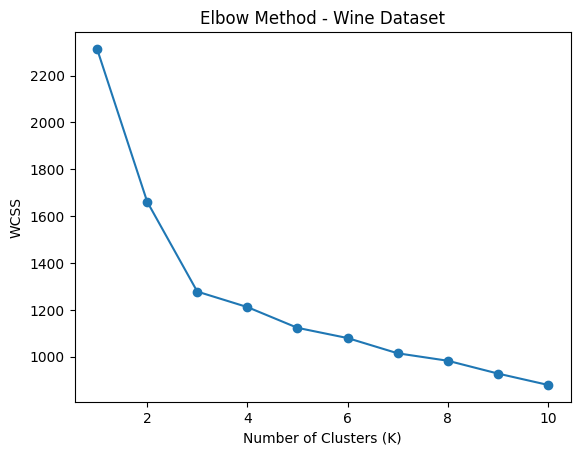

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import KMeans

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method - Wine Dataset")
plt.show()

# Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.



Text(0, 0.5, 'Feature 2')

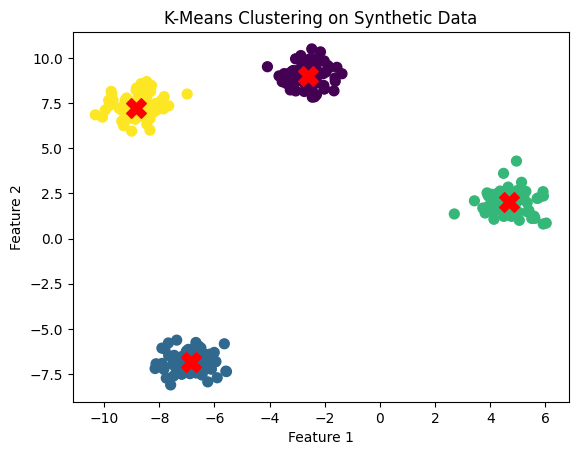

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Visualize clusters + centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')

plt.title("K-Means Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


# Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).



In [6]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 1: Load dataset
wine = load_wine()
X = wine.data

# Step 2: Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=6)  # tune eps & min_samples as needed
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count clusters (excluding noise = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters found (excluding noise):", n_clusters)
print("Number of noise points:", n_noise)


Number of clusters found (excluding noise): 6
Number of noise points: 138


# Question 8: Generate moon-shaped synthetic data using  make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.


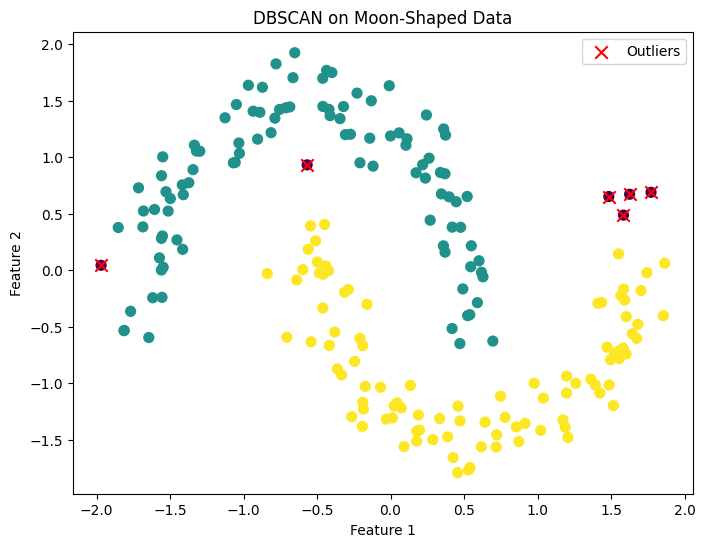

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 2: Scale data (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # parameters tuned for moons
labels = dbscan.fit_predict(X_scaled)

# Step 4: Plot clusters and outliers
plt.figure(figsize=(8, 6))
# Normal clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)

# Highlight outliers (label = -1) in red
outliers = (labels == -1)
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], c='red', s=80, marker='x', label="Outliers")

plt.title("DBSCAN on Moon-Shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


# Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.


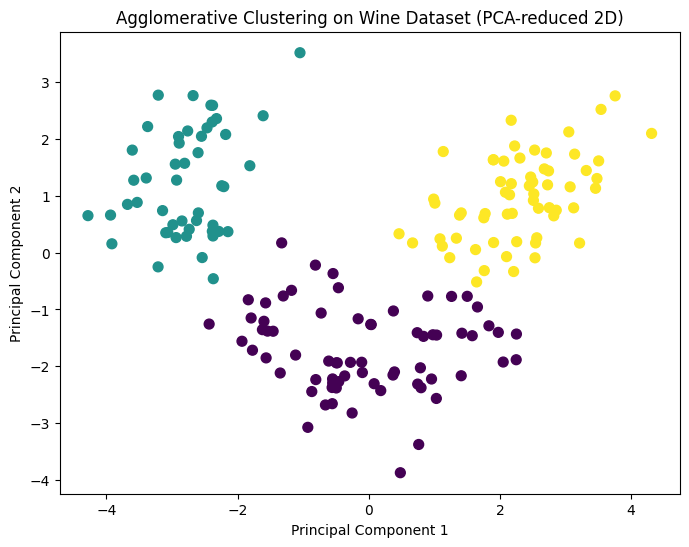

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce dimensions to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')  # 3 clusters expected
labels = agg.fit_predict(X_pca)

# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA-reduced 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their productpurchase history across categories.
# Describe your real-world data science workflow using clustering:
# ● Which clustering algorithm(s) would you use and why?
# ● How would you preprocess the data (missing values, scaling)?
# ● How would you determine the number of clusters?
# ● How would the marketing team benefit from your clustering analysis?

Real-World Clustering Workflow
1. Choice of Clustering Algorithm

K-Means:

Works well for large datasets (scales to millions of customers).

Creates distinct, non-overlapping customer segments.

Easy for marketing to interpret (e.g., “4 customer types”).

DBSCAN (secondary option):

If dataset contains outliers (e.g., one-time luxury buyers).

Useful when customer groups have irregular shapes.

Agglomerative Clustering:

Good for smaller datasets, when marketing wants to see hierarchy (tree of segments).

👉 Recommendation: Start with K-Means for scalability and interpretability, validate with silhouette score / elbow method, then test DBSCAN to detect niche outlier groups.

2. Data Preprocessing

Handle Missing Values:

If demographics (e.g., age, income) missing → impute using median/mean.

If purchase history missing → treat as zero purchases.

Feature Engineering:

Compute RFM features (Recency, Frequency, Monetary value).

Normalize product category purchases (electronics %, clothing %, etc.).

Scaling:

Use StandardScaler or Min-Max Scaling, since clustering is distance-based.

Prevents high-value features (e.g., annual income) from dominating.

3. Determining the Number of Clusters

Elbow Method: Plot WCSS vs K → choose the elbow point.

Silhouette Score: Higher values indicate better cluster separation.

Business Input: Even if metrics suggest 6 clusters, marketing may prefer 4–5 groups for campaign simplicity.

4. Deliverables & Benefits for Marketing

Cluster Profiles:

Example:

Cluster 1 → Young, low-spending, trend-driven buyers.

Cluster 2 → Middle-aged, high-spending, loyal customers.

Cluster 3 → Bargain hunters (frequent discounts).

Cluster 4 → Occasional luxury buyers.

Actionable Promotions:

Personalized marketing (discounts for bargain hunters, loyalty rewards for frequent buyers).

Product recommendations tailored to cluster preferences.

Business Impact:

Higher conversion rates.

Better allocation of marketing budget.

Improved customer retention & satisfaction.
